# Prepare dataset
The purpose of this file is to normalize dataset to have same size along the whole dataset in one run. 
This code finds all files from the directory and cuts each of them into smaller pieces of same *length*, optionally with a *stride*. If the  piece of a file is shorter than a *length* but still longer than a *minimum length treshold* zeroes at the end of a file are padded (to make the size equal to *length*).

To-do list

**Part 1**
* [x] find all files in the directory
* [x] prepare a strategy how to cut files: user gives file length in seconds, but we oparate on array indexes
* [x] cut sound into pieces 
* [x] apply melspectrogram
* [x] save files

**Part 2**
* [ ] Prepare test, validation and training sets with k-fold validation

## Create list of all files to cut

In [1]:
%matplotlib inline
import matplotlib
matplotlib.interactive(False)
matplotlib.use('Agg')

# find all of the files in the directory
import os
import gc
basePath="../data/xeno-canto-dataset-full-all-Countries/"
melsPath= "../data/mels-27class/"

birds=[] # list of all birds
for root, dirs, files in os.walk(basePath):
    if root == basePath:
        birds=dirs
birds50=[]                
flist=[] # list of all files
blist=[] # list of files for one bird 
i50=0;
for i, bird in enumerate(birds):
    for root, dirs, files in os.walk(basePath+bird):
        for file in files:
            if file.endswith(".mp3"):
                blist.append(os.path.join(root, file))
    if len(blist) > 50:
        i50 = i50+1;
        print(i50, ". Found ", len(blist), ' files for ', bird ,'(',i+1,')')
        birds50.append(bird)
        flist.append(blist)
    blist=[]
print(birds50) 
print(root)

1 . Found  1931  files for  Parusmajor ( 1 )
2 . Found  123  files for  Turduspilaris ( 2 )
3 . Found  384  files for  Passerdomesticus ( 3 )
4 . Found  396  files for  Luscinialuscinia ( 4 )
5 . Found  518  files for  Phoenicurusphoenicurus ( 7 )
6 . Found  1587  files for  Erithacusrubecula ( 8 )
7 . Found  56  files for  Picapica ( 9 )
8 . Found  358  files for  Phoenicurusochruros ( 10 )
9 . Found  136  files for  Garrulusglandarius ( 11 )
10 . Found  183  files for  Passermontanus ( 12 )
11 . Found  89  files for  Coccothraustescoccothraustes ( 15 )
12 . Found  389  files for  Sittaeuropaea ( 16 )
13 . Found  872  files for  Alaudaarvensis ( 17 )
14 . Found  314  files for  Streptopeliadecaocto ( 18 )
15 . Found  2154  files for  Phylloscopustrochilus ( 19 )
16 . Found  57  files for  Delichonurbicum ( 20 )
17 . Found  1890  files for  Turdusphilomelos ( 21 )
18 . Found  1627  files for  Phylloscopuscollybita ( 22 )
19 . Found  2141  files for  Fringillacoelebs ( 23 )
20 . Found  

## Find strategy to cut the file
We want to cut files to smaller pieces of the desired size (5 seconds in example), and stride of 1 second. Stride tells us how different pieces of files will overlap at each other.

In [2]:
def saveMel(signal, directory):
    gc.enable()
    # MK_spectrogram modified
    N_FFT = 1024         # 
    HOP_SIZE = 1024      #  
    N_MELS = 128          # Higher   
    WIN_SIZE = 1024      # 
    WINDOW_TYPE = 'hann' # 
    FEATURE = 'mel'      # 
    FMIN = 1400

    fig = plt.figure(1,frameon=False)
    fig.set_size_inches(6,6)

    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    
    S = librosa.feature.melspectrogram(y=signal, sr=sr,
                                        n_fft=N_FFT,
                                        hop_length=HOP_SIZE, 
                                        n_mels=N_MELS, 
                                        htk=True, 
                                        fmin=FMIN, # higher limit ##high-pass filter freq.
                                        fmax=sr/2) # AMPLITUDE
    librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN) #power = S**2

    fig.savefig(directory)
    plt.ioff()
    #plt.show(block=False)
    fig.clf()
    ax.cla()
    plt.clf()
    plt.close('all')

In [3]:
import warnings
warnings.filterwarnings('ignore')

import sys
from tqdm import tqdm_notebook as tqdm
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

size = {'desired': 5, # [seconds]
        'minimum': 4, # [seconds]
        'stride' : 0, # [seconds]
        'name': 5 # [number of letters]
       } # stride should not be bigger than desired length

print('Number of directories to check and cut: ', len(flist))

#step = (size['desired']-size['stride'])*sr # length of step between two cuts in seconds
step=1
if step>0:
    for bird, birdList in enumerate(flist):
        print("Processing ",bird,'. ', birds50[bird], "...")
        for birdnr, path in tqdm(enumerate(birdList)):
            # load the mp3 file
            directory=melsPath+str(bird)+birds50[bird][:size['name']]+"/"

            if not os.path.exists(directory):
                os.makedirs(directory)
                
            if not os.path.exists(directory+path.rsplit('/',1)[1].replace(' ', '')[:-4]+"1_1.png"):
                  
                signal, sr = librosa.load(path) # sr = sampling rate
                step = (size['desired']-size['stride'])*sr # length of step between two cuts in seconds
                
                nr=0;
                for start, end in zip(range(0,len(signal),step),range(size['desired']*sr,len(signal),step)):
                    # cut file and save each piece
                    nr=nr+1
                    # save the file if its length is higher than minimum
                    if end-start > size['minimum']*sr:
                        melpath=path.rsplit('/',1)[1]
                        melpath=directory+melpath.replace(' ', '')[:-4]+str(nr)+"_"+str(nr)+".png"
                        saveMel(signal[start:end],melpath)
                    #print('New file...',start/sr,' - ',end/sr)
                    #print('Start: ',start,'end: ', end, 'length: ', end-start)
                
            pass
else:    
    print("Error: Stride should be lower than desired length.")
    
print('Number of files after cutting: ')


Number of directories to check and cut:  27
Processing  0 .  Parusmajor ...



Processing  1 .  Turduspilaris ...



Processing  2 .  Passerdomesticus ...



Processing  3 .  Luscinialuscinia ...



Processing  4 .  Phoenicurusphoenicurus ...



Processing  5 .  Erithacusrubecula ...



Processing  6 .  Picapica ...



Processing  7 .  Phoenicurusochruros ...



Processing  8 .  Garrulusglandarius ...



Processing  9 .  Passermontanus ...



Processing  10 .  Coccothraustescoccothraustes ...



Processing  11 .  Sittaeuropaea ...



Processing  12 .  Alaudaarvensis ...



Processing  13 .  Streptopeliadecaocto ...



Processing  14 .  Phylloscopustrochilus ...



Processing  15 .  Delichonurbicum ...



Processing  16 .  Turdusphilomelos ...



Processing  17 .  Phylloscopuscollybita ...



Processing  18 .  Fringillacoelebs ...



Processing  19 .  Sturnusvulgaris ...



Processing  20 .  Emberizacitrinella ...



Processing  21 .  Columbapalumbus ...



Processing  22 .  Troglodytestroglodytes ...



Processing  23 .  Cardueliscarduelis ...



Processing  24 .  Chlorischloris ...



Processing  25 .  Motacillaalba ...



Processing  26 .  Turdusmerula ...



Number of files after cutting: 


['15Delic', '5Erith', '4Phoen', '20Ember', '16Turdu', '6Picap', '21Colum', '13Strep', '11Sitta', '10Cocco', '18Fring', '26Turdu', '23Cardu', '12Alaud', '24Chlor', '25Motac', '7Phoen', '14Phyll', '8Garru', '3Lusci', '1Turdu', '0Parus', '19Sturn', '17Phyll', '2Passe', '22Trogl', '9Passe']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


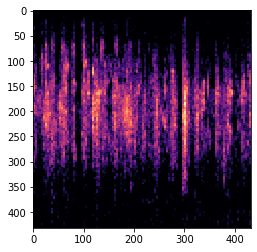

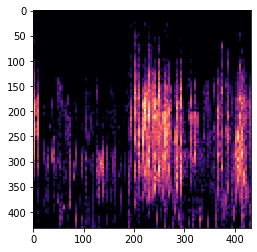

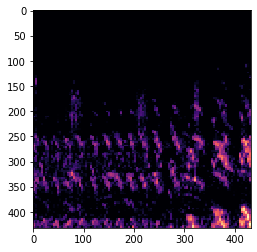

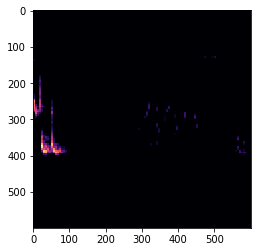

Found  498837  files


In [4]:
# Test
import matplotlib.image as mpimg
ilist=[]
for root, dirs, files in os.walk(melsPath):
    print(dirs)
    for file in files:
        if file.endswith(".png"):
            ilist.append(os.path.join(root, file))
img=mpimg.imread(ilist[0])
imgplot = plt.imshow(img)
plt.show()
img=mpimg.imread(ilist[100])
imgplot = plt.imshow(img)
plt.show()
img=mpimg.imread(ilist[1000])
imgplot = plt.imshow(img)
plt.show()
img=mpimg.imread(ilist[40000])
imgplot = plt.imshow(img)
plt.show()
print("Found ",len(ilist)," files")

In [5]:
#print(path)
#os.remove(path)